In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np
from numpy import load
import scipy
import matplotlib.pyplot as plt
from scipy.special import legendre
from numpy.linalg import svd

from time import time
import pandas as pd
from scipy.special import chebyt
from scipy.special import hermite

import os

In [2]:
from joblib import Parallel, delayed

In [3]:
import pandas as pd
scale=StandardScaler()


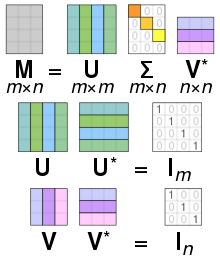

`sum  `

In [4]:
x = np.linspace(-0.999999,0.999999,500000)
# data frame label 12 columns 12 rows by number of x
df = pd.DataFrame(index=range(1,13), columns=range(1,13))
for i in range(0,12):
    for j in range(0,12):
        n1=np.linalg.norm(chebyt(i)(x))
        n2=np.linalg.norm(chebyt(j)(x))
        df.iloc[i,j]=np.dot((chebyt(i)(x))/((1-x**2)**0.5),chebyt(j)(x))/(n1*n2)
df

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.571134,0.0,0.000497,0.0,0.000484,0.0,0.000482,0.0,0.000481,0.0,0.00048,0.0
2,0.0,2.357206,0.0,0.000843,0.0,0.000835,0.0,0.000833,0.0,0.000832,0.0,0.000832
3,0.000497,0.0,1.68372,0.0,0.000708,0.0,0.000705,0.0,0.000704,0.0,0.000703,0.0
4,0.0,0.000843,0.0,1.617692,0.0,0.000692,0.0,0.00069,0.0,0.00069,0.0,0.000689
5,0.000484,0.0,0.000708,0.0,1.596818,0.0,0.000687,0.0,0.000685,0.0,0.000685,0.0
6,0.0,0.000835,0.0,0.000692,0.0,1.587507,0.0,0.000684,0.0,0.000683,0.0,0.000683
7,0.000482,0.0,0.000705,0.0,0.000687,0.0,1.582539,0.0,0.000682,0.0,0.000682,0.0
8,0.0,0.000833,0.0,0.00069,0.0,0.000684,0.0,1.579572,0.0,0.000681,0.0,0.000681
9,0.000481,0.0,0.000704,0.0,0.000685,0.0,0.000682,0.0,1.577659,0.0,0.000681,0.0
10,0.0,0.000832,0.0,0.00069,0.0,0.000683,0.0,0.000681,0.0,1.576352,0.0,0.00068


In [5]:
x = np.linspace(-100000,100000,500000)
# data frame label 12 columns 12 rows by number of x
df = pd.DataFrame(index=range(1,13), columns=range(1,13))
for i in range(0,12):
    for j in range(0,12):
        n1=np.linalg.norm(hermite(i)(x))
        n2=np.linalg.norm(hermite(j)(x))
        df.iloc[i,j] = np.dot((hermite(i)(x) * np.exp(-x**2)), hermite(j)(x)) 
df




,1,2,3,4,5,6,7,8,9,10,11,12
1,4.431126,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.000001
2,0.0,8.862252,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.000001,-0.000004
3,-0.0,0.0,35.449006,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.000001,0.000002,0.000008
4,-0.0,0.0,-0.0,212.694037,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.000002,0.000005
5,0.0,-0.0,0.0,-0.0,1701.552294,0.0,-0.0,-0.0,-0.0,0.000003,-0.000005,0.000008
6,-0.0,0.0,-0.0,-0.0,0.0,17015.522938,-0.0,-0.0,-0.000002,-0.000009,0.00005,0.000349
7,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,204186.275251,-0.000002,-0.000011,-0.000015,0.000223,0.001061
8,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.000002,2858607.853502,-0.000026,0.000132,0.000155,0.00196
9,-0.0,0.0,-0.0,-0.0,-0.0,-0.000002,-0.000011,-0.000026,45737725.656318,-0.000101,0.001466,0.013644
10,-0.0,0.0,-0.000001,-0.0,0.000003,-0.000009,-0.000015,0.000132,-0.000101,823279061.813077,0.009145,0.014766


### img

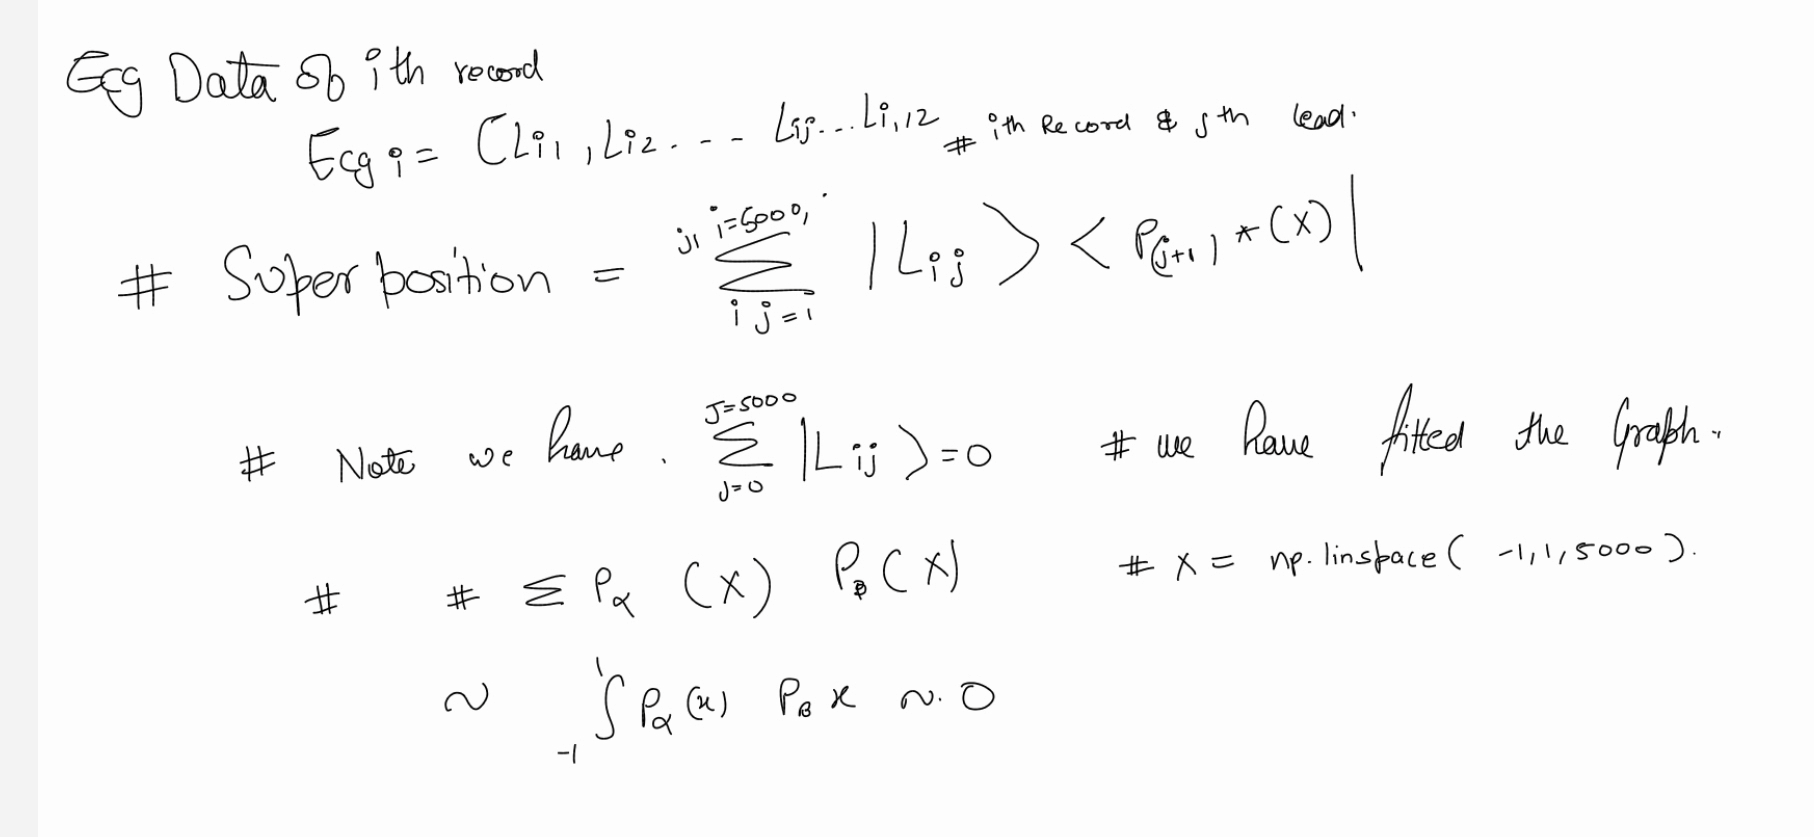

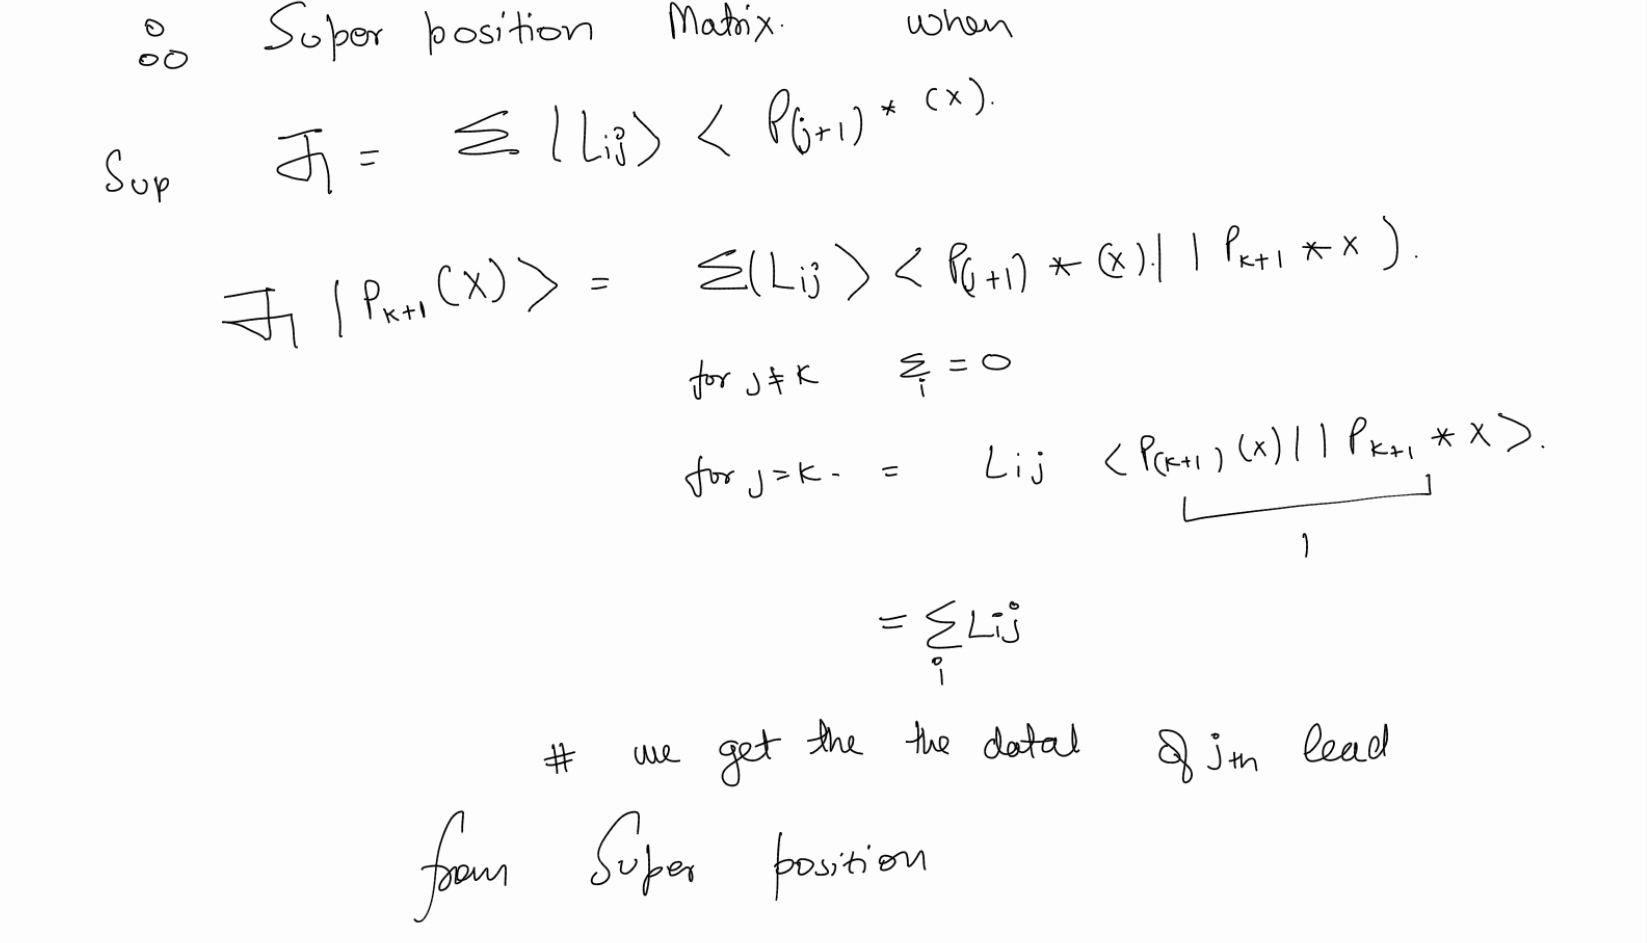

## def function


In [6]:
#DEF FUNCTION INPUT SHOULD BE ONLY INT GIVE SQUARE
# chebyshev polynomial
# hermite polynomial

#import chebyshev
from scipy.special import chebyt
from scipy.special import hermite


import math
def superposition_cheb(data: np.ndarray):# it will create super position of 12 lead ecg data 
    """
    This function takes a 5000 * 12 lead data and returns the superposition of the data.
    superpostion matrix multiplied by legendre(j+1)(x) we get the j-th column of the data matrix 
    or we can say the jth lead of the ecg data
    """
    scale=StandardScaler()
    # making each colum of 5000 datapoint should be in
    scaled = scale.fit_transform(data)# normal distribution of each column of the data matrix # feature scaling
    sum=np.zeros((5000,5000))
    x = np.linspace(-1,1,5000)
    for i in range(data.shape[1]):
        cheb=chebyt(i+1)(x)
        norm=math.sqrt(np.sum(cheb*cheb))
        sum=sum+np.outer(scaled[:,i],#data is in shaPE OF 5000xDATA.shape[1] AN SHAPE[1] MEANS THE NUMBER OF COLUMNS
                         cheb#legendre polinomial of order i+1 apllied to x p_n applies to matrix x
                         )/norm
        #outer product of the i-th column of the data matrix and the i-th legendre polynomial
        
    
    return sum

def singularvaluedecomposition(data):
    data_sup = superposition_cheb(data)
    a, data_svd, b = svd(data_sup)

    return data_svd

def normalize_matrix(matrix):
    """take input as 500*12 or a person report and return the normalized matrix 
    >>>sum of square of all the elements of the norm_matrix is 1"""
    
    matrix_norm = np.linalg.norm(matrix, 'fro')#frobenius norm is the square root of the sum of the absolute squares of its elements
                                                # works for 2d arrays
    if np.isnan(matrix_norm):# is NAN not a number 
        #it will return a matrix of zeros of the same shape as the input matrix
        return np.zeros_like(matrix)
    else:
        normalized_matrix = matrix / matrix_norm
        return normalized_matrix
    
def coarse_grain_cheb(data,f):
    """ 
    This function takes a 2D numpy array and an integer f as input and returns the coarse grained image of the data.
    which means that the data is divided into fxf blocks and the mean of each block is calculated and stored in a new matrix.
    or we can say we reduce the resolution of the image by a factor of f"""
    img = superposition_cheb(data)#superposition of the data

    s1=np.zeros((int(img.shape[0]/f)#shape[0] is the number of rows
                 ,int(img.shape[1]/f))#shape[1] is the number of columns
                 ) # Coarse grained image'

    for i in range(s1.shape[0]):# s1 is zero matrix of shape[0] rows and shape[1] columns
        for j in range(s1.shape[1]):
            s1[i,j]=np.mean(img[i*f:i*f+f,j*f:j*f+f]) # changing the value of the s1 zero matrix to the mean of the fxf block of the img matrix

    return s1

In [7]:

os.chdir("..")
os.getcwd()# i have numpy files in main/data_prep

'/home/karansingh/Documents/summer term/ECG_ML/MAIN'

# Saving data

### typ1

In [8]:
############################################################
    
#### SR_data

data = load('data_prep/unq_disease_SR.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)

# ensure destination exists relative to current working dir (MAIN)
dst_dir = os.path.join("ML", "Data_cheb")
os.makedirs(dst_dir, exist_ok=True)

for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))
    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 22)(delayed(coarse_grain_cheb)(x,50) for x in cc)
    end = time()
    print(end - start)

    results = np.array(results)
    cc = [results[j].ravel() for j in range(results.shape[0])]
    out_path = os.path.join(dst_dir, f'disease_SR_cheb_{i}.txt')
    np.savetxt(out_path, cc)


216.46773838996887
214.9682731628418
215.78695940971375
214.86453771591187
215.40883493423462
214.81076574325562
214.9618697166443
214.9404537677765
215.05136108398438
214.93347549438477


In [9]:
############################################################
    
#### SB data
    
data = load('data_prep/unq_disease_SB.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)

# ensure destination exists relative to current working dir (MAIN)
dst_dir = os.path.join("ML", "Data_cheb")
os.makedirs(dst_dir, exist_ok=True)

for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        #norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j])) # oriignal line
    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 10)(delayed(coarse_grain_cheb)(x,50) for x in cc)
    end = time()

    print(end - start)
    results = np.array(results)# coarse grained of 500 reports
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())

    out_path = os.path.join(dst_dir, f'disease_SB_cheb_{i}.txt')
    np.savetxt(out_path, cc)
    print(f"Saved: {out_path}")


208.3711371421814
Saved: ML/Data_cheb/disease_SB_cheb_0.txt
207.31670784950256
Saved: ML/Data_cheb/disease_SB_cheb_1.txt
207.32129216194153
Saved: ML/Data_cheb/disease_SB_cheb_2.txt
207.30039739608765
Saved: ML/Data_cheb/disease_SB_cheb_3.txt
207.23217248916626
Saved: ML/Data_cheb/disease_SB_cheb_4.txt
207.15746307373047
Saved: ML/Data_cheb/disease_SB_cheb_5.txt
207.19488644599915
Saved: ML/Data_cheb/disease_SB_cheb_6.txt
207.29204392433167
Saved: ML/Data_cheb/disease_SB_cheb_7.txt
207.1633141040802
Saved: ML/Data_cheb/disease_SB_cheb_8.txt
207.40794825553894
Saved: ML/Data_cheb/disease_SB_cheb_9.txt


In [10]:


data = load('data_prep/unq_disease_ST.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)

# ensure destination exists relative to current working dir (MAIN)
dst_dir = os.path.join("ML", "Data_cheb")
os.makedirs(dst_dir, exist_ok=True)

for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        #norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j])) # recheck this line

    cc = norm_matrix
    
    start = time()
    results = Parallel(n_jobs = 14)(delayed(coarse_grain_cheb)(x,50) for x in cc)
    end = time()
    print(end - start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())

    out_path = os.path.join(dst_dir, f'disease_ST_cheb_{i}.txt')
    np.savetxt(out_path, cc)
    print(f"Saved: {out_path}")

126.89123034477234
Saved: ML/Data_cheb/disease_ST_cheb_0.txt
125.60328602790833
Saved: ML/Data_cheb/disease_ST_cheb_1.txt
125.72766447067261
Saved: ML/Data_cheb/disease_ST_cheb_2.txt
125.77404594421387
Saved: ML/Data_cheb/disease_ST_cheb_3.txt
125.51299262046814
Saved: ML/Data_cheb/disease_ST_cheb_4.txt
125.59387636184692
Saved: ML/Data_cheb/disease_ST_cheb_5.txt
125.63714385032654
Saved: ML/Data_cheb/disease_ST_cheb_6.txt
125.49355840682983
Saved: ML/Data_cheb/disease_ST_cheb_7.txt
125.50873327255249
Saved: ML/Data_cheb/disease_ST_cheb_8.txt
125.47700572013855
Saved: ML/Data_cheb/disease_ST_cheb_9.txt


### typ2

In [11]:
############################################################
    
#### SB_data

data = load('data_prep/disease_SB.npy')

split_number = 10
if len(data) % split_number == 0:  # to split data in the 10 parts
    data_split = np.array_split(data, split_number)  # numpy array of (5000, 5000, 12)
    ### data got splitted in (500, 5000, 12) each

# ensure destination exists relative to current working dir (MAIN)
dst_dir_typ2 = os.path.join("ML", "Data_cheb_typ2")
os.makedirs(dst_dir_typ2, exist_ok=True)

for i in range(split_number):
    """
        500 report[500,5000,12] >>> normalised all 500 report >>> superposition of 12 lead[500,5000,5000] >>> coarse grain[500,100,100] >>> saving the flatten layer in txt format
    """
    cc = data_split[i]  # each 500 data

    norm_matrix = []
    for j in range(len(cc)):  # cc[j] give j th report consist of 5000x12 matrix
        # norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j]))  # recheck this line
        """ 
        norm matrix is a list of normalised 5000x12 matrices of 500 reports from cc
        # len is 500
        """

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs=10)(delayed(coarse_grain_cheb)(x, 50) for x in cc)
    end = time()

    print(end - start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())

    out_path = os.path.join(dst_dir_typ2, f'disease_SB_cheb_{i}.txt')
    np.savetxt(out_path, cc)
    print(f"Saved: {out_path}")


209.26855039596558
Saved: ML/Data_cheb_typ2/disease_SB_cheb_0.txt
207.49339413642883
Saved: ML/Data_cheb_typ2/disease_SB_cheb_1.txt
207.62808799743652
Saved: ML/Data_cheb_typ2/disease_SB_cheb_2.txt
207.55805015563965
Saved: ML/Data_cheb_typ2/disease_SB_cheb_3.txt
207.56407403945923
Saved: ML/Data_cheb_typ2/disease_SB_cheb_4.txt
207.54256439208984
Saved: ML/Data_cheb_typ2/disease_SB_cheb_5.txt
208.93997526168823
Saved: ML/Data_cheb_typ2/disease_SB_cheb_6.txt
209.29439616203308
Saved: ML/Data_cheb_typ2/disease_SB_cheb_7.txt
207.62418675422668
Saved: ML/Data_cheb_typ2/disease_SB_cheb_8.txt
207.4907829761505
Saved: ML/Data_cheb_typ2/disease_SB_cheb_9.txt


In [12]:
############################################################
    
#### SR_data

data = load('data_prep/disease_SR.npy')

split_number = 10
if len(data) % split_number == 0:  # to split data in the 10 parts
    data_split = np.array_split(data, split_number)  # numpy array of (5000, 5000, 12)
    ### data got splitted in (500, 5000, 12) each

# ensure destination exists relative to current working dir (MAIN)
dst_dir_typ2 = os.path.join("ML", "Data_cheb_typ2")
os.makedirs(dst_dir_typ2, exist_ok=True)

for i in range(split_number):
    """
        500 report[500,5000,12] >>> normalised all 500 report >>> superposition of 12 lead[500,5000,5000] >>> coarse grain[500,100,100] >>> saving the flatten layer in txt format
    """
    cc = data_split[i]  # each 500 data

    norm_matrix = []
    for j in range(len(cc)):  # cc[j] give j th report consist of 5000x12 matrix
        # norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j]))  # recheck this line
        """ 
        norm matrix is a list of normalised 5000x12 matrices of 500 reports from cc
        # len is 500
        """

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs=10)(delayed(coarse_grain_cheb)(x, 50) for x in cc)
    end = time()

    print(end - start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())

    out_path = os.path.join(dst_dir_typ2, f'disease_SR_cheb_{i}.txt')
    np.savetxt(out_path, cc)
    print(f"Saved: {out_path}")


207.47262144088745
Saved: ML/Data_cheb_typ2/disease_SR_cheb_0.txt
207.49822545051575
Saved: ML/Data_cheb_typ2/disease_SR_cheb_1.txt
207.47152185440063
Saved: ML/Data_cheb_typ2/disease_SR_cheb_2.txt
207.49307107925415
Saved: ML/Data_cheb_typ2/disease_SR_cheb_3.txt
207.5223560333252
Saved: ML/Data_cheb_typ2/disease_SR_cheb_4.txt
207.48055744171143
Saved: ML/Data_cheb_typ2/disease_SR_cheb_5.txt
209.01253700256348
Saved: ML/Data_cheb_typ2/disease_SR_cheb_6.txt
207.60838174819946
Saved: ML/Data_cheb_typ2/disease_SR_cheb_7.txt
207.66212940216064
Saved: ML/Data_cheb_typ2/disease_SR_cheb_8.txt
207.51378226280212
Saved: ML/Data_cheb_typ2/disease_SR_cheb_9.txt


In [13]:
############################################################
    
#### ST_data

data = load('data_prep/disease_ST.npy')

split_number = 10
if len(data) % split_number == 0:  # to split data in the 10 parts
    data_split = np.array_split(data, split_number)  # numpy array of (5000, 5000, 12)
    ### data got splitted in (500, 5000, 12) each

# ensure destination exists relative to current working dir (MAIN)
dst_dir_typ2 = os.path.join("ML", "Data_cheb_typ2")
os.makedirs(dst_dir_typ2, exist_ok=True)

for i in range(split_number):
    """
        500 report[500,5000,12] >>> normalised all 500 report >>> superposition of 12 lead[500,5000,5000] >>> coarse grain[500,100,100] >>> saving the flatten layer in txt format
    """
    cc = data_split[i]  # each 500 data

    norm_matrix = []
    for j in range(len(cc)):  # cc[j] give j th report consist of 5000x12 matrix
        # norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j]))  # recheck this line
        """ 
        norm matrix is a list of normalised 5000x12 matrices of 500 reports from cc
        # len is 500
        """

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs=10)(delayed(coarse_grain_cheb)(x, 50) for x in cc)
    end = time()

    print(end - start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())

    out_path = os.path.join(dst_dir_typ2, f'disease_ST_cheb_{i}.txt')
    np.savetxt(out_path, cc)
    print(f"Saved: {out_path}")


208.76214981079102
Saved: ML/Data_cheb_typ2/disease_ST_cheb_0.txt
207.6568787097931
Saved: ML/Data_cheb_typ2/disease_ST_cheb_1.txt
207.69960236549377
Saved: ML/Data_cheb_typ2/disease_ST_cheb_2.txt
207.5768814086914
Saved: ML/Data_cheb_typ2/disease_ST_cheb_3.txt
208.36344647407532
Saved: ML/Data_cheb_typ2/disease_ST_cheb_4.txt
209.17862176895142
Saved: ML/Data_cheb_typ2/disease_ST_cheb_5.txt
208.43032574653625
Saved: ML/Data_cheb_typ2/disease_ST_cheb_6.txt
208.76922273635864
Saved: ML/Data_cheb_typ2/disease_ST_cheb_7.txt
208.27156567573547
Saved: ML/Data_cheb_typ2/disease_ST_cheb_8.txt
208.5591435432434
Saved: ML/Data_cheb_typ2/disease_ST_cheb_9.txt


# HERM



In [ ]:
#DEF FUNCTION INPUT SHOULD BE ONLY INT GIVE SQUARE
# chebyshev polynomial
# hermite polynomial

#import chebyshev
from scipy.special import chebyt
from scipy.special import hermite


import math
def superposition_herm(data: np.ndarray):# it will create super position of 12 lead ecg data 
    """
    This function takes a 5000 * 12 lead data and returns the superposition of the data.
    superpostion matrix multiplied by legendre(j+1)(x) we get the j-th column of the data matrix 
    or we can say the jth lead of the ecg data
    """
    scale=StandardScaler()
    # making each colum of 5000 datapoint should be in
    scaled = scale.fit_transform(data)# normal distribution of each column of the data matrix # feature scaling
    sum=np.zeros((5000,5000))
    x = np.linspace(-10000,10000,5000)
    for i in range(data.shape[1]):
        cheb=hermite(i+1)(x)
        norm=math.sqrt(np.sum(cheb*cheb))
        sum=sum+np.outer(scaled[:,i],#data is in shaPE OF 5000xDATA.shape[1] AN SHAPE[1] MEANS THE NUMBER OF COLUMNS
                         cheb#legendre polinomial of order i+1 apllied to x p_n applies to matrix x
                         )/norm
        #outer product of the i-th column of the data matrix and the i-th legendre polynomial
        
    
    return sum

def singularvaluedecomposition(data):
    data_sup = superposition_herm(data)
    a, data_svd, b = svd(data_sup)

    return data_svd

def normalize_matrix(matrix):
    """take input as 500*12 or a person report and return the normalized matrix 
    >>>sum of square of all the elements of the norm_matrix is 1"""
    
    matrix_norm = np.linalg.norm(matrix, 'fro')#frobenius norm is the square root of the sum of the absolute squares of its elements
                                                # works for 2d arrays
    if np.isnan(matrix_norm):# is NAN not a number 
        #it will return a matrix of zeros of the same shape as the input matrix
        return np.zeros_like(matrix)
    else:
        normalized_matrix = matrix / matrix_norm
        return normalized_matrix
    
def coarse_grain_herm(data,f):
    """ 
    This function takes a 2D numpy array and an integer f as input and returns the coarse grained image of the data.
    which means that the data is divided into fxf blocks and the mean of each block is calculated and stored in a new matrix.
    or we can say we reduce the resolution of the image by a factor of f"""
    img = superposition_herm(data)#superposition of the data

    s1=np.zeros((int(img.shape[0]/f)#shape[0] is the number of rows
                 ,int(img.shape[1]/f))#shape[1] is the number of columns
                 ) # Coarse grained image'

    for i in range(s1.shape[0]):# s1 is zero matrix of shape[0] rows and shape[1] columns
        for j in range(s1.shape[1]):
            s1[i,j]=np.mean(img[i*f:i*f+f,j*f:j*f+f]) # changing the value of the s1 zero matrix to the mean of the fxf block of the img matrix

    return s1

### typ 1

In [ ]:
############################################################
    
#### SR_data

data = load('data_prep/unq_disease_SR.npy')

split_number = 10
if len(data)%split_number == 0:# to split data in the 10 parts
    data_split = np.array_split(data,split_number)# numpy array of (5000, 5000, 12)
    ### data got splitted in (500, 5000, 12) each

# ensure destination directory exists (saving under MAIN/ML/Data_herm)
dst_dir = os.path.join(".", "ML", "Data_herm")
os.makedirs(dst_dir, exist_ok=True)

for i in range(split_number):
    """
        500 report[500,5000,12] >>> normalised all 500 report >>> superposition of 12 lead[500,5000,5000] >>> coarse grain[500,100,100] >>> saving the flatten layer in txt fpormat
    """
    cc = data_split[i] #each 500 data

    norm_matrix = []

    for j in range(len(cc)):# cc[j] give j th report consist of 5000x12 matrix
        # norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j])) # recheck this line
        """ 
        norm matrix is a list of normalised 5000x12 matrices of 500 reports from cc
        # len is 500
        """
  

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 22)(delayed(coarse_grain_herm)(x,50) for x in cc)
    end = time()

    print(end- start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())
    out_path = os.path.join(dst_dir, 'disease_SR_herm_100' + '_'+str(i) + '.txt')
    np.savetxt(out_path, cc)
    print(f"Saved: {out_path}")


231.94618725776672
Saved: ./ML/Data_herm/disease_SR_herm_100_0.txt
228.85823035240173
Saved: ./ML/Data_herm/disease_SR_herm_100_1.txt
235.38763093948364
Saved: ./ML/Data_herm/disease_SR_herm_100_2.txt
236.2413685321808
Saved: ./ML/Data_herm/disease_SR_herm_100_3.txt
237.3446502685547
Saved: ./ML/Data_herm/disease_SR_herm_100_4.txt
234.17148733139038
Saved: ./ML/Data_herm/disease_SR_herm_100_5.txt
231.21896934509277
Saved: ./ML/Data_herm/disease_SR_herm_100_6.txt
226.93408393859863
Saved: ./ML/Data_herm/disease_SR_herm_100_7.txt
222.8848111629486
Saved: ./ML/Data_herm/disease_SR_herm_100_8.txt
222.51324820518494
Saved: ./ML/Data_herm/disease_SR_herm_100_9.txt


In [ ]:
############################################################
    
#### SB data (save into MAIN/ML/Data_herm)

data = load('data_prep/unq_disease_SB.npy')

# ensure destination directory exists (saving under MAIN/ML/Data_herm)
dst_dir = os.path.join(".", "ML", "Data_herm")
os.makedirs(dst_dir, exist_ok=True)

split_number = 10
if len(data) % split_number == 0:
    data_split = np.array_split(data, split_number)

for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))
    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs=22)(delayed(coarse_grain_herm)(x, 50) for x in cc)
    end = time()

    print(f"Chunk {i}: processing time = {end - start:.2f} s")

    results = np.array(results)  # coarse-grained of 500 reports
    cc = [results[j].ravel() for j in range(results.shape[0])]
    out_path = os.path.join(dst_dir, 'disease_SB_herm_100' + '_' + str(i) + '.txt')
    np.savetxt(out_path, cc)
    print(f"Saved: {out_path}")


Chunk 0: processing time = 222.90 s
Saved: ./ML/Data_herm/disease_SB_herm_100_0.txt
Chunk 1: processing time = 222.84 s
Saved: ./ML/Data_herm/disease_SB_herm_100_1.txt
Chunk 2: processing time = 222.71 s
Saved: ./ML/Data_herm/disease_SB_herm_100_2.txt
Chunk 3: processing time = 222.81 s
Saved: ./ML/Data_herm/disease_SB_herm_100_3.txt
Chunk 4: processing time = 223.25 s
Saved: ./ML/Data_herm/disease_SB_herm_100_4.txt
Chunk 5: processing time = 222.48 s
Saved: ./ML/Data_herm/disease_SB_herm_100_5.txt
Chunk 6: processing time = 222.86 s
Saved: ./ML/Data_herm/disease_SB_herm_100_6.txt
Chunk 7: processing time = 222.90 s
Saved: ./ML/Data_herm/disease_SB_herm_100_7.txt
Chunk 8: processing time = 222.99 s
Saved: ./ML/Data_herm/disease_SB_herm_100_8.txt
Chunk 9: processing time = 222.64 s
Saved: ./ML/Data_herm/disease_SB_herm_100_9.txt


In [ ]:
############################################################
    
#### ST data (save into MAIN/ML/Data_herm)

data = load('data_prep/unq_disease_ST.npy')

# ensure destination directory exists (saving under MAIN/ML/Data_herm)
dst_dir = os.path.join(".", "ML", "Data_herm")
os.makedirs(dst_dir, exist_ok=True)

split_number = 10
if len(data) % split_number == 0:
    data_split = np.array_split(data, split_number)

for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))
    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs=22)(delayed(coarse_grain_herm)(x, 50) for x in cc)
    end = time()

    print(f"Chunk {i}: processing time = {end - start:.2f} s")

    results = np.array(results)  # coarse-grained of 500 reports
    cc = [results[j].ravel() for j in range(results.shape[0])]
    out_path = os.path.join(dst_dir, 'disease_ST_herm_100' + '_' + str(i) + '.txt')
    np.savetxt(out_path, cc)
    print(f"Saved: {out_path}")


Chunk 0: processing time = 137.31 s
Saved: ./ML/Data_herm/disease_ST_herm_100_0.txt
Chunk 1: processing time = 143.16 s
Saved: ./ML/Data_herm/disease_ST_herm_100_1.txt
Chunk 2: processing time = 142.61 s
Saved: ./ML/Data_herm/disease_ST_herm_100_2.txt
Chunk 3: processing time = 141.96 s
Saved: ./ML/Data_herm/disease_ST_herm_100_3.txt
Chunk 4: processing time = 142.06 s
Saved: ./ML/Data_herm/disease_ST_herm_100_4.txt
Chunk 5: processing time = 141.68 s
Saved: ./ML/Data_herm/disease_ST_herm_100_5.txt
Chunk 6: processing time = 141.61 s
Saved: ./ML/Data_herm/disease_ST_herm_100_6.txt
Chunk 7: processing time = 137.37 s
Saved: ./ML/Data_herm/disease_ST_herm_100_7.txt
Chunk 8: processing time = 141.39 s
Saved: ./ML/Data_herm/disease_ST_herm_100_8.txt
Chunk 9: processing time = 142.28 s
Saved: ./ML/Data_herm/disease_ST_herm_100_9.txt


### typ2

In [ ]:
############################################################
    
#### SR_data

data = load('data_prep/disease_SR.npy')

split_number = 10
if len(data)%split_number == 0:# to split data in the 10 parts
    data_split = np.array_split(data,split_number)# numpy array of (5000, 5000, 12)
    ### data got splitted in (500, 5000, 12) each

# ensure destination exists (you're in MAIN)
dst_dir = "ML/Data_herm_typ2"
os.makedirs(dst_dir, exist_ok=True)

for i in range(split_number):
    """
        500 report[500,5000,12] >>> normalised all 500 report >>> superposition of 12 lead[500,5000,5000] >>> coarse grain[500,100,100] >>> saving the flatten layer in txt fpormat
    """
    cc = data_split[i] #each 500 data

    norm_matrix = []

    for j in range(len(cc)):# cc[j] give j th report consist of 5000x12 matrix
        # norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j])) # recheck this line
        """ 
        norm matrix is a list of normalised 5000x12 matrices of 500 reports from cc
        # len is 500
        """
  

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 10)(delayed(coarse_grain_herm)(x,50) for x in cc)
    end = time()

    print(end- start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())
    out_path = os.path.join(dst_dir, f'disease_SR_herm_100_{i}.txt')
    np.savetxt(out_path, cc)


218.08679032325745
215.07805037498474
215.03174543380737
216.15354824066162
218.87884497642517
219.10662126541138
218.90720415115356
218.9142837524414
219.43101716041565
219.20528531074524


In [ ]:
############################################################
    
#### SR_data

data = load('data_prep/disease_SB.npy')

split_number = 10
if len(data)%split_number == 0:# to split data in the 10 parts
    data_split = np.array_split(data,split_number)# numpy array of (5000, 5000, 12)
    ### data got splitted in (500, 5000, 12) each

# ensure destination exists (you're in MAIN)
dst_dir = "ML/Data_herm_typ2"
os.makedirs(dst_dir, exist_ok=True)

for i in range(split_number):
    """
        500 report[500,5000,12] >>> normalised all 500 report >>> superposition of 12 lead[500,5000,5000] >>> coarse grain[500,100,100] >>> saving the flatten layer in txt fpormat
    """
    cc = data_split[i] #each 500 data

    norm_matrix = []

    for j in range(len(cc)):# cc[j] give j th report consist of 5000x12 matrix
        # norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j])) # recheck this line
        """ 
        norm matrix is a list of normalised 5000x12 matrices of 500 reports from cc
        # len is 500
        """
  

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 10)(delayed(coarse_grain_herm)(x,50) for x in cc)
    end = time()

    print(end- start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())
    out_path = os.path.join(dst_dir, f'disease_SB_herm_100_{i}.txt')
    np.savetxt(out_path, cc)
    print(f"Saved {out_path}")



216.61906814575195
Saved ML/Data_herm_typ2/disease_SB_herm_100_0.txt
214.85300970077515
Saved ML/Data_herm_typ2/disease_SB_herm_100_1.txt
216.4877724647522
Saved ML/Data_herm_typ2/disease_SB_herm_100_2.txt
219.07159090042114
Saved ML/Data_herm_typ2/disease_SB_herm_100_3.txt
218.79370141029358
Saved ML/Data_herm_typ2/disease_SB_herm_100_4.txt
218.8808925151825
Saved ML/Data_herm_typ2/disease_SB_herm_100_5.txt
218.86438298225403
Saved ML/Data_herm_typ2/disease_SB_herm_100_6.txt
219.01129269599915
Saved ML/Data_herm_typ2/disease_SB_herm_100_7.txt
218.85612201690674
Saved ML/Data_herm_typ2/disease_SB_herm_100_8.txt
218.9301733970642
Saved ML/Data_herm_typ2/disease_SB_herm_100_9.txt


In [ ]:
############################################################
    
#### ST_data -> save to MAIN/ML/Data_herm_typ2

dst_dir = "ML/Data_herm_typ2"
os.makedirs(dst_dir, exist_ok=True)

data = load('data_prep/disease_ST.npy')

# ensure splitting
if len(data) % split_number == 0:
    data_split = np.array_split(data, split_number)

for i in range(split_number):
    cc = data_split[i]  # each chunk of 500 reports

    # normalize each report
    norm_matrix = [normalize_matrix(cc[j]) for j in range(len(cc))]
    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs=10)(delayed(coarse_grain_herm)(x, 50) for x in cc)
    end = time()

    print(f"Split {i}: processing time {end - start:.2f} seconds")

    results = np.array(results)
    rows = [results[j].ravel() for j in range(results.shape[0])]

    out_path = os.path.join(dst_dir, f'disease_ST_herm_100_{i}.txt')
    np.savetxt(out_path, rows)
    print(f"Saved {out_path}")


Split 0: processing time 218.97 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_0.txt
Split 1: processing time 219.19 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_1.txt
Split 2: processing time 219.36 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_2.txt
Split 3: processing time 219.12 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_3.txt
Split 4: processing time 218.88 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_4.txt
Split 5: processing time 218.94 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_5.txt
Split 6: processing time 220.53 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_6.txt
Split 7: processing time 220.46 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_7.txt
Split 8: processing time 219.14 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_8.txt
Split 9: processing time 218.95 seconds
Saved ML/Data_herm_typ2/disease_ST_herm_100_9.txt
